In [ ]:
**UDA CITY PROJECT**
in this project I chose dataset from Airbnb website which is 'listings'.


In [3]:
#here I imported the nacassery files.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#Read the csv file 
df = pd.read_csv('listings.csv')

In [4]:
#pull the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,257.0,1,41,2024-05-02,0.30,27,177,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,249.0,3,78,2024-05-20,0.48,1,178,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,240.0,1,121,2024-06-05,0.77,2,204,30,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,229.0,5,13,2024-05-06,0.08,3,70,5,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,450.0,5,234,2024-06-03,1.40,3,222,29,HUTB-150671


In [5]:
#the columns that have missing values
set(df.columns[df.isnull().sum() != 0])

{'host_name', 'last_review', 'license', 'price', 'reviews_per_month'}

In [6]:
#remove all rows that have missing values.
new_df = df.dropna(axis= 0)

In [7]:
df.shape

(18925, 18)

In [8]:
new_df.shape

(9640, 18)

In [9]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,257.0,1,41,2024-05-02,0.30,27,177,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,249.0,3,78,2024-05-20,0.48,1,178,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,240.0,1,121,2024-06-05,0.77,2,204,30,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,229.0,5,13,2024-05-06,0.08,3,70,5,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,450.0,5,234,2024-06-03,1.40,3,222,29,HUTB-150671


In [10]:
now i will ask question that should be answered!
Q1: Is the home/apartment that have min night is expensive?
Q2: with increase of the space the price will be higher?
Q3: which room that usually busy?


SyntaxError: invalid syntax (2563334717.py, line 1)

In [11]:
ans_df = df[['latitude', 'longitude', 'room_type', 'minimum_nights', 'availability_365', 'price']]
ans_df.head()

,latitude,longitude,room_type,minimum_nights,availability_365,price
0,41.405560,2.17262,Entire home/apt,1,177,257.0
1,41.412432,2.21975,Entire home/apt,3,178,249.0
2,41.405660,2.17015,Entire home/apt,1,204,240.0
3,41.380620,2.17517,Entire home/apt,5,70,229.0
4,41.379780,2.17623,Entire home/apt,5,222,450.0


In [12]:
num_vars = ans_df[['price', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'availability_365']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['latitude', 'longitude', 'minimum_nights', 'availability_365']]
y = df_dropna['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.033076928440168296 on 4557 values.'

In [13]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = ans_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [14]:
#Dropping where the price has missing values
df  = df.dropna(subset=['price'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(15189, 24143)


<Axes: xlabel='minimum_nights', ylabel='price'>

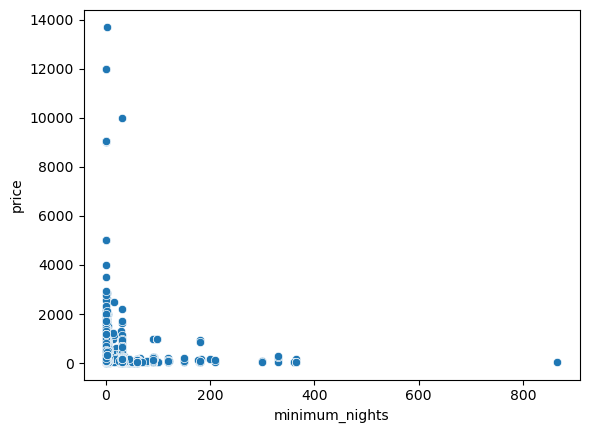

In [15]:
#answer Q1
# Scatter plot of price vs. minimum nights
sns.scatterplot(x='minimum_nights', y='price', data=df_dropna)



<Axes: xlabel='latitude', ylabel='price'>

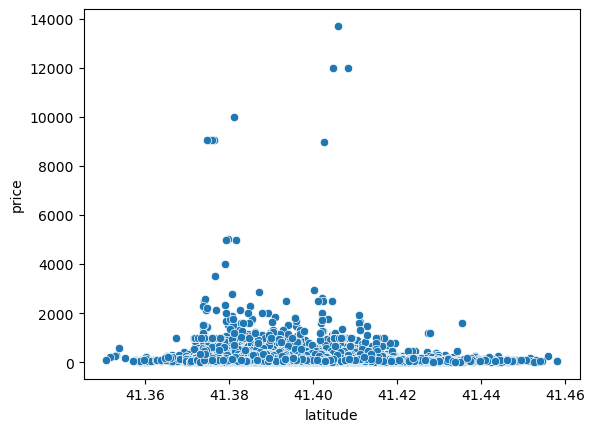

In [17]:
# answer Q2

sns.scatterplot(x='latitude', y='price', data=df_dropna)




<Axes: xlabel='room_type', ylabel='availability_365'>

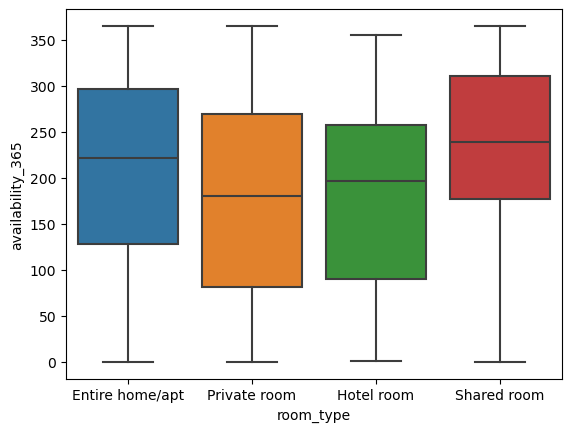

In [18]:
#answer Q3

sns.boxplot(x='room_type', y='availability_365', data=df)




<Axes: xlabel='room_type', ylabel='availability_365'>

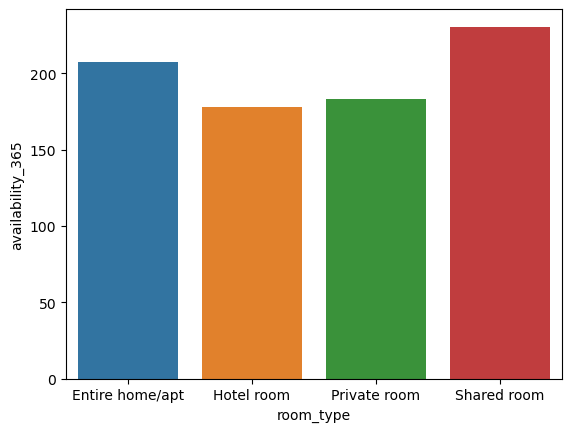

In [20]:
# Bar plot to show average availability by room type
room_availability = df.groupby('room_type')['availability_365'].mean().reset_index()
sns.barplot(x='room_type', y='availability_365', data=room_availability)


In [ ]:
#analysis & conclusion 
#Q1

#I created a scatter plot of price vs. minimum_nights and a boxplot showing the distribution of prices based on quartiles of minimum_nights.
#The scatter plot shows how the price varies with the minimum number of nights required to book a property.

#Conclusion:

#If there’s no clear upward trend in the scatter plot, this suggests that the minimum number of nights required doesn’t significantly impact the price.


In [ ]:
#analysis & conclusion 
#Q2

#dataset doesn't explicitly have a "space" variable, latitude and longitude might be proxies for location or the extent of a geographic area.

#Conclusion:

#Scatter Plots: If you observe that prices increase with latitude or longitude in a particular direction, it could suggest that properties in certain areas (north/south or east/west) are more expensive, which might be indirectly related to space or location desirability.
#If no clear pattern emerges, it might suggest that price isn't strongly correlated with geographic space as captured by latitude and longitude alone.

In [ ]:
#analysis & conclusion 
#Q3

#I used boxplots to visualize the distribution of availability (availability_365) by room type and calculated the average availability for each room type.

#Conclusion:

#Boxplot and Bar Plot: If certain room types (e.g., entire home/apt, private room, shared room) have lower average availability, this indicates they are more frequently booked and thus busier.
#For example, if private room has significantly lower average availability than shared room, it suggests that private room is more in demand and hence busier.